In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
raw1=pd.read_csv("서울경마_더미4.csv",engine = 'python')
raw2=pd.read_csv("서울경마_더미4.csv",engine = 'python')
raw3=pd.read_csv("서울경마_더미4.csv",engine = 'python')


In [3]:
raw1=raw1.dropna()
raw1=raw1.reset_index(drop=True)
raw2=raw2.dropna()
raw2=raw2.reset_index(drop=True)
raw3=raw3.dropna()
raw3=raw3.reset_index(drop=True)



In [4]:
# 1마리만 1등
for i in range(len(raw1)):
    if raw1.iloc[i,0] < 2:
        raw1.iloc[i,0]=1
    else:
        raw1.iloc[i,0]=0

In [5]:
# 2마리가 1등 2등
for i in range(len(raw2)):
    if raw2.iloc[i,0] < 3:
        raw2.iloc[i,0]=1
    else:
        raw2.iloc[i,0]=0

In [6]:
# 3마리가 1등 2등 3등
for i in range(len(raw3)):
    if raw3.iloc[i,0] < 4:
        raw3.iloc[i,0]=1
    else:
        raw3.iloc[i,0]=0

### RF model 적용


In [8]:
rf1_result=[]
rf1_recall1=[]
rf1_recall0=[]
rf1_c_m=[]
rf1_yscore=[]
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw1, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    rf=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False)
    cl=rf.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
    yscore=cl.predict_proba(te_X)
    
    
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    rf1_yscore.append(yscore)
    
    
    rf1_result.append(acc)
    rf1_recall1.append(re1)
    rf1_recall0.append(re0)
    rf1_c_m.append(cm)
    
print(np.mean(rf1_result))
print(np.mean(rf1_recall1))
print(np.mean(rf1_recall0))




iter 0
training
test
iter 1
training
test
iter 2
training
test
iter 3
training
test
iter 4
training
test
iter 5
training
test
iter 6
training
test
iter 7
training
test
iter 8
training
test
iter 9
training
test
iter 10
training
test
iter 11
training
test
iter 12
training
test
iter 13
training
test
iter 14
training
test
iter 15
training
test
iter 16
training
test
iter 17
training
test
iter 18
training
test
iter 19
training
test
iter 20
training
test
iter 21
training
test
iter 22
training
test
iter 23
training
test
iter 24
training
test
iter 25
training
test
iter 26
training
test
iter 27
training
test
iter 28
training
test
iter 29
training
test
0.9275437942601567
0.315404803016781
0.9906820038464552


In [15]:
rf1_c_m[0]

array([[4802,   39],
       [ 352,  173]], dtype=int64)

In [18]:
cm1=pd.DataFrame()
for i in rf1_c_m:
    x=i.reshape(4,)
    cm1=pd.concat([cm1,pd.DataFrame(x)],axis=1)
cm1.mean(axis=1)


0    4819.033333
1      45.333333
2     343.466667
3     158.166667
dtype: float64

In [11]:
rf2_result=[]
rf2_recall1=[]
rf2_recall0=[]
rf2_c_m=[]
rf2_yscore=[]
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw2, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    rf=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False)
    cl=rf.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
    yscore=cl.predict_proba(te_X)
    
    
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    rf2_yscore.append(yscore)
    
    
    rf2_result.append(acc)
    rf2_recall1.append(re1)
    rf2_recall0.append(re0)
    rf2_c_m.append(cm)
    
print(np.mean(rf2_result))
print(np.mean(rf2_recall1))
print(np.mean(rf2_recall0))




iter 0
training
test
iter 1
training
test
iter 2
training
test
iter 3
training
test
iter 4
training
test
iter 5
training
test
iter 6
training
test
iter 7
training
test
iter 8
training
test
iter 9
training
test
iter 10
training
test
iter 11
training
test
iter 12
training
test
iter 13
training
test
iter 14
training
test
iter 15
training
test
iter 16
training
test
iter 17
training
test
iter 18
training
test
iter 19
training
test
iter 20
training
test
iter 21
training
test
iter 22
training
test
iter 23
training
test
iter 24
training
test
iter 25
training
test
iter 26
training
test
iter 27
training
test
iter 28
training
test
iter 29
training
test
0.8759348987451858
0.472480033100285
0.9682617616739264


In [19]:
cm2=pd.DataFrame()
for i in rf2_c_m:
    x=i.reshape(4,)
    cm2=pd.concat([cm2,pd.DataFrame(x)],axis=1)
cm2.mean(axis=1)

0    4228.100000
1     138.600000
2     527.133333
3     472.166667
dtype: float64

In [12]:
rf3_result=[]
rf3_recall1=[]
rf3_recall0=[]
rf3_c_m=[]
rf3_yscore=[]
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw3, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    rf=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False)
    cl=rf.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
    yscore=cl.predict_proba(te_X)
    
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    rf3_yscore.append(yscore)
    
    
    rf3_result.append(acc)
    rf3_recall1.append(re1)
    rf3_recall0.append(re0)
    rf3_c_m.append(cm)
    
print(np.mean(rf3_result))
print(np.mean(rf3_recall1))
print(np.mean(rf3_recall0))




iter 0
training
test
iter 1
training
test
iter 2
training
test
iter 3
training
test
iter 4
training
test
iter 5
training
test
iter 6
training
test
iter 7
training
test
iter 8
training
test
iter 9
training
test
iter 10
training
test
iter 11
training
test
iter 12
training
test
iter 13
training
test
iter 14
training
test
iter 15
training
test
iter 16
training
test
iter 17
training
test
iter 18
training
test
iter 19
training
test
iter 20
training
test
iter 21
training
test
iter 22
training
test
iter 23
training
test
iter 24
training
test
iter 25
training
test
iter 26
training
test
iter 27
training
test
iter 28
training
test
iter 29
training
test
0.8412038762579204
0.6104609252287523
0.9305555862873592


In [20]:
cm3=pd.DataFrame()
for i in rf3_c_m:
    x=i.reshape(4,)
    cm3=pd.concat([cm3,pd.DataFrame(x)],axis=1)
cm3.mean(axis=1)

0    3599.900000
1     268.666667
2     583.433333
3     914.000000
dtype: float64

In [ ]:
cm=pd.DataFrame()
for i in c_m:
    x=i.reshape(4,)
    cm=pd.concat([cm,pd.DataFrame(x)],axis=1)


In [ ]:
cm.mean(axis=1)

### LR model 적용

In [22]:
lr1_result=[]
lr1_recall1=[]
lr1_recall0=[]
lr1_c_m=[]
lr1_ym = []
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw1, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    lr=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr')
    cl=lr.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
    
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    ym=classification_report(te_Y,pred)
    
    lr1_result.append(acc)
    lr1_recall1.append(re1)
    lr1_recall0.append(re0)
    lr1_c_m.append(cm)
    lr1_ym.append(ym)
    
print(np.mean(lr1_result))
print(np.mean(lr1_recall1))
print(np.mean(lr1_recall0))





iter 0
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 1
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 2
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 3
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 4
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 5
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 6
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 7
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 8
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 9
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 10
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 11
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 12
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 13
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 14
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 15
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 16
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 17
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 18
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 19
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 20
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 21
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 22
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 23
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 24
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 25
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 26
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 27
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 28
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 29
training
test
0.9087153683687416
0.09031785782786396
0.9925916531698316


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [33]:
print(lr1_c_m[0])

[[4844   37]
 [ 442   43]]


In [25]:
print(lr1_ym[0])

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4881
           1       0.54      0.09      0.15       485

   micro avg       0.91      0.91      0.91      5366
   macro avg       0.73      0.54      0.55      5366
weighted avg       0.88      0.91      0.88      5366



In [26]:
lr2_result=[]
lr2_recall1=[]
lr2_recall0=[]
lr2_c_m=[]
lr2_ym = []
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw2, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    lr=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr')
    cl=lr.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
       
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    ym=classification_report(te_Y,pred)    
    
    
    lr2_result.append(acc)
    lr2_recall1.append(re1)
    lr2_recall0.append(re0)
    lr2_c_m.append(cm)
    lr2_ym.append(ym)
    
    
print(np.mean(lr2_result))
print(np.mean(lr2_recall1))
print(np.mean(lr2_recall0))




iter 0
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 1
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 2
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 3
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 4
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 5
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 6
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 7
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 8
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 9
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 10
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 11
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 12
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 13
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 14
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 15
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 16
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 17
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 18
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 19
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 20
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 21
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 22
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 23
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 24
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 25
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 26
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 27
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 28
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 29
training
test
0.8395080134178159
0.3147561794684235
0.9596152706975064


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [34]:
print(lr2_c_m[0])

[[4127  197]
 [ 717  325]]


In [27]:
print(lr2_ym[0])

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4324
           1       0.62      0.31      0.42      1042

   micro avg       0.83      0.83      0.83      5366
   macro avg       0.74      0.63      0.66      5366
weighted avg       0.81      0.83      0.81      5366



In [28]:
lr3_result=[]
lr3_recall1=[]
lr3_recall0=[]
lr3_c_m=[]
lr3_ym = []
for i in range(30):
    print("iter",i)
    tr_data, te_data = train_test_split(raw3, test_size=0.2)
    
    tr_X = tr_data.iloc[:,1:]
    tr_Y = tr_data.iloc[:,0]
    te_X = te_data.iloc[:,1:]
    te_Y = te_data.iloc[:,0]
    
    print('training')
    lr=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr')
    cl=lr.fit(tr_X.values,tr_Y.values)
    
    print("test")
    pred=cl.predict(te_X)
    
    acc=np.sum(te_Y.values==pred)/len(pred)
    re1= metrics.recall_score(te_Y.values, pred,pos_label=1)
    re0 = metrics.recall_score(te_Y.values, pred,pos_label=0)
    cm=confusion_matrix(te_Y,pred,labels=[0,1])
    ym=classification_report(te_Y,pred)    

    
    lr3_result.append(acc)
    lr3_recall1.append(re1)
    lr3_recall0.append(re0)
    lr3_c_m.append(cm)
    lr3_ym.append(ym)

    
print(np.mean(lr3_result))
print(np.mean(lr3_recall1))
print(np.mean(lr3_recall0))




iter 0
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 1
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 2
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 3
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 4
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 5
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 6
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 7
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 8
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 9
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 10
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 11
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 12
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 13
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 14
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 15
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 16
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 17
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 18
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 19
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 20
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 21
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 22
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 23
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 24
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 25
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 26
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 27
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 28
training


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


test
iter 29
training
test
0.7965088830910674
0.5166821011922693
0.905504626273188


C:\ProgramData\Miniconda3\envs\mjs\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [35]:
print(lr3_c_m[0])

[[3507  373]
 [ 691  795]]


In [29]:
print(lr3_ym[0])

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3880
           1       0.68      0.53      0.60      1486

   micro avg       0.80      0.80      0.80      5366
   macro avg       0.76      0.72      0.73      5366
weighted avg       0.79      0.80      0.79      5366



In [64]:
cm=pd.DataFrame()
for i in c_m:
    x=i.reshape(4,)
    cm=pd.concat([cm,pd.DataFrame(x)],axis=1)


In [65]:
cm.mean(axis=1)

0    3496.233333
1     372.133333
2     723.000000
3     774.633333
dtype: float64

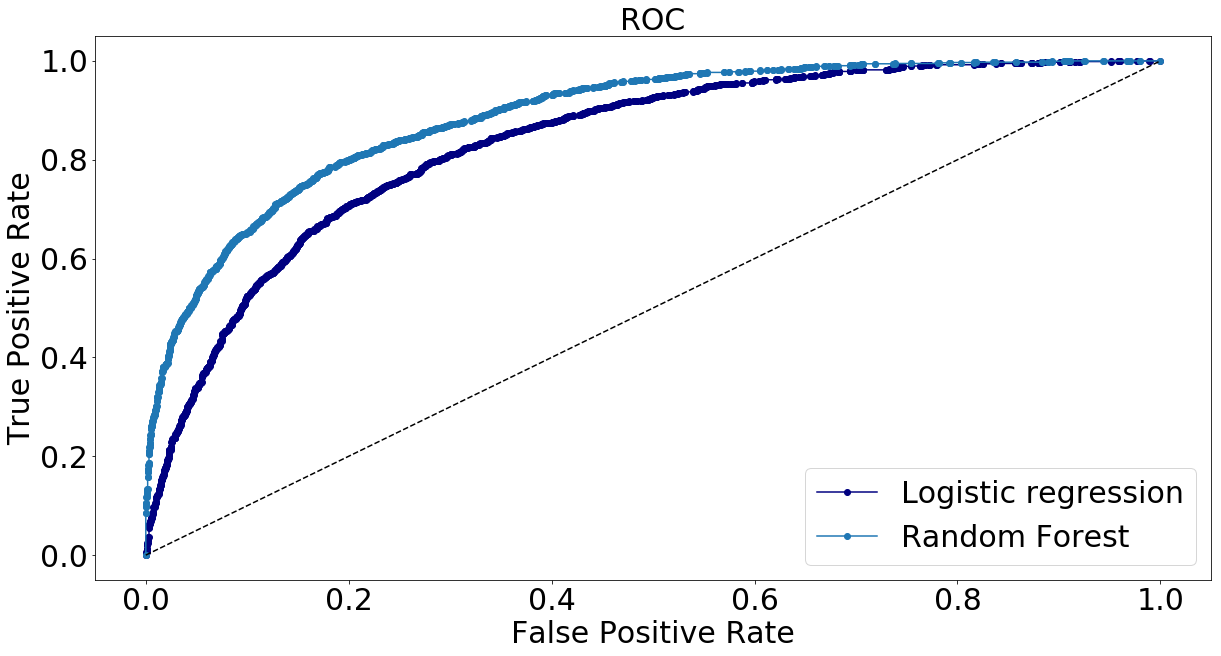

In [106]:
plt.figure(figsize=(20,10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30) 

plt.plot(fpr1, tpr1, '-o',label="Logistic regression",color='navy')
plt.plot(fpr2, tpr2,'-o' ,label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate',size=30)
plt.ylabel('True Positive Rate',size=30)
plt.title('ROC',size=30)
plt.legend(loc="lower right",prop={'size':30})
plt.show()